In [1]:
import os
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, load_model

C:\Users\Rohit Gopalakrishnan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Rohit Gopalakrishnan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Rohit Gopalakrishnan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Rohit Gopalakrishnan\anaconda3\lib\site-packages\ten

# Sample Input

In [2]:
media = input("Enter the media file to be checked: ")

Enter the media file to be checked: Input4.mp4


In [3]:
media

'Input4.mp4'

# Pre-Processing

In [4]:
detector = cv2.CascadeClassifier("Classifiers/haarcascade_frontalface_alt.xml")

In [5]:
def imageDetect():
    image = cv2.imread('Inputs/' + media)
    cnt = 0
    
    faces = detector.detectMultiScale (image, 1.2, 5)
    for face in faces:
        if not os.path.exists("Faces/"+media.split('.')[0]):
            os.mkdir("Faces/"+media.split('.')[0])
        x, y, w, h = face
        crop_img = image[y:(y+h), x:(x+w)]
        final_img = cv2.detailEnhance(crop_img, 10, 0.15)
        cv2.imwrite('Faces/'+media.split('.')[0]+'/'+str(cnt)+'.png', cv2.resize(final_img, (256, 256)))
        cnt+=1
        
    return cnt

In [6]:
def videoDetect():
    cap = cv2.VideoCapture ('Inputs/' + media)
    frameRate = cap.get(5)
    cnt = 0
    
    while cap.isOpened():
        frameId = cap.get(1)
        ret, frame = cap.read()
        if ret != True:
            break
        if frameId % math.floor(frameRate) == 1:
            faces = detector.detectMultiScale (frame, 1.2, 5)
            for face in faces:
                if not os.path.exists("Faces/"+media.split('.')[0]):
                    os.mkdir("Faces/"+media.split('.')[0])
                if not os.path.exists("Frames/"+media.split('.')[0]):
                    os.mkdir("Frames/"+media.split('.')[0])
                cv2.imwrite('Frames/'+media.split('.')[0]+'/'+str(cnt)+'.png', frame)
                x, y, w, h = face
                crop_img = frame[y:(y+h), x:(x+w)]
                final_img = cv2.detailEnhance(crop_img, 10, 0.15)
                cv2.imwrite('Faces/'+media.split('.')[0]+'/'+str(cnt)+'.png', cv2.resize(final_img, (256, 256)))
                cnt+=1
                
    return cnt

In [7]:
imgExt = ["jpg", "png", "tiff", "raw"]
vidExt = ["mp4", "mov", "avi", "mkv"]
count = 0

if media.split('.')[1] in imgExt:
    count = imageDetect()
    print(count, "faces extracted")
elif media.split('.')[1] in vidExt:
    count = videoDetect()
    print(count, "faces extracted")
else:
    print("ERROR: Check media file type properly...")

9 faces extracted


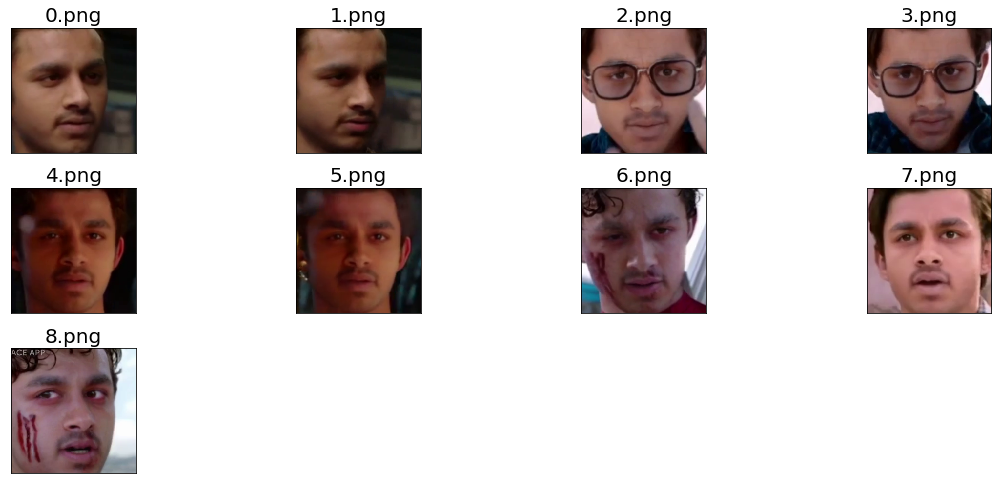

In [8]:
fig = plt.figure(figsize=(16,9))
faces = []
for i in range(count):
    img = cv2.cvtColor (cv2.imread('Faces/'+media.split('.')[0]+'/'+str(i)+'.png'), cv2.COLOR_BGR2RGB)
    faces.append(img)
    fig.add_subplot(4,4,i+1)
    plt.title(str(i)+'.png', fontsize = 20)
    plt.imshow(np.squeeze(img))
    plt.tight_layout()
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
plt.show;

# Predictive Model


In [9]:
model = load_model('Models/deepfake_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
confidences = []
for i in range(count):
    tmp = np.array([faces[i]])
    pred = model.predict(tmp/255)
    confidences.append(pred[0][0])
    print("Prediction made for", str(i)+".png")

Prediction made for 0.png
Prediction made for 1.png
Prediction made for 2.png
Prediction made for 3.png
Prediction made for 4.png
Prediction made for 5.png
Prediction made for 6.png
Prediction made for 7.png
Prediction made for 8.png


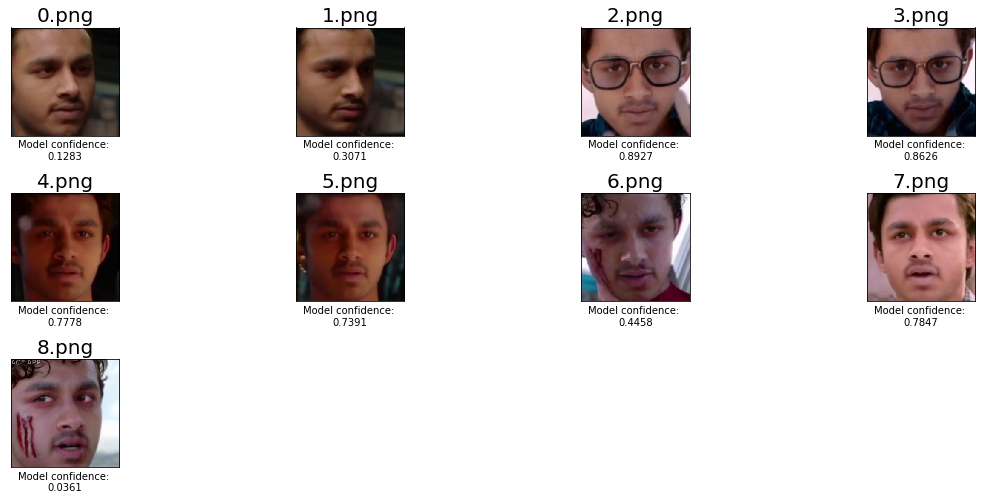

In [11]:
fig = plt.figure(figsize=(16,9))
for i in range(count):
    fig.add_subplot(4,4,i+1)
    plt.title(str(i)+'.png', fontsize = 20)
    plt.imshow(np.squeeze(faces[i]))
    plt.xlabel(f"Model confidence: \n{confidences[i]:.4f}")
    plt.tight_layout()
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
plt.show;

# Image Restoration

In [12]:
if not os.path.exists("Restores/"+media.split('.')[0]):
    os.mkdir("Restores/"+media.split('.')[0])

In [13]:
%run run.py --input_folder {"Faces/"+media.split('.')[0]} --output_folder {"Restores/"+media.split('.')[0]}

Running Stage 1: Overall restoration
Now you are processing 0.png
Now you are processing 1.png
Now you are processing 2.png
Now you are processing 3.png
Now you are processing 4.png
Now you are processing 5.png
Now you are processing 6.png
Now you are processing 7.png
Now you are processing 8.png
Finish Stage 1 ...


Running Stage 2: Face Detection
1
1
1
1
1
1
1
1
1
Finish Stage 2 ...


Running Stage 3: Face Enhancement
The main GPU is 
0
dataset [FaceTestDataset] of size 1 was created
The size of the latent vector size is [8,8]
Network [SPADEGenerator] was created. Total number of parameters: 92.1 million. To see the architecture, do print(network).
hi :)
Finish Stage 3 ...


Running Stage 4: Blending
Finish Stage 4 ...


All the processing is done. Please check the results.


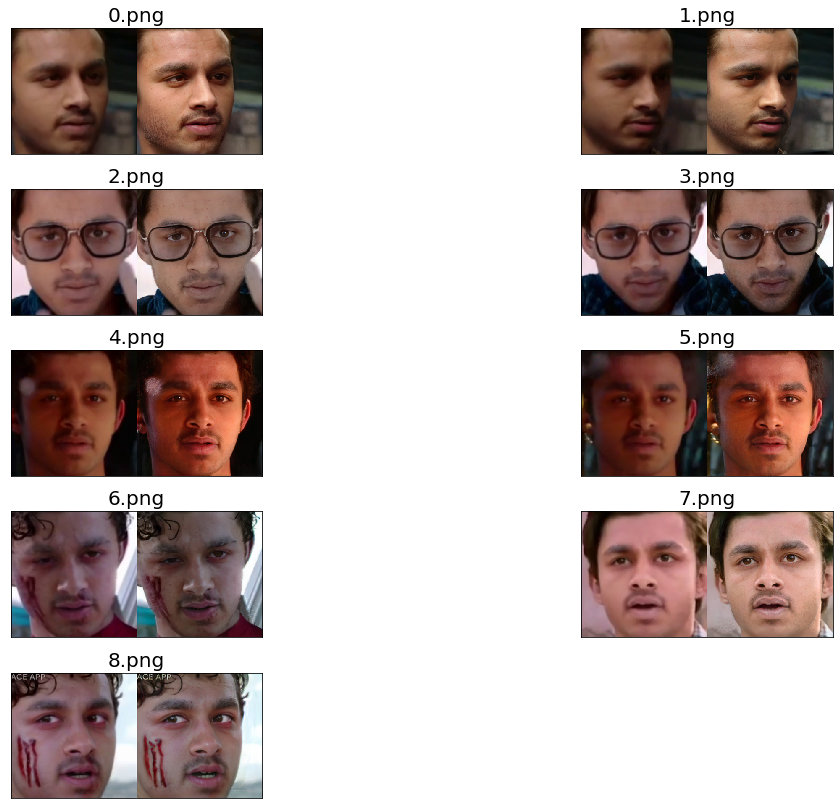

In [14]:
fig = plt.figure(figsize=(16,18))
for i in range(count):
    img = cv2.cvtColor (cv2.imread('Restoration/Restores/'+media.split('.')[0]+'/'+str(i)+'.png'), cv2.COLOR_BGR2RGB)
    fig.add_subplot(8,2,i+1)
    plt.title(str(i)+'.png', fontsize = 20)
    plt.imshow(np.squeeze(img))
    plt.tight_layout()
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
plt.show;

# Deepfake Result

Real Faces Predicted: 5


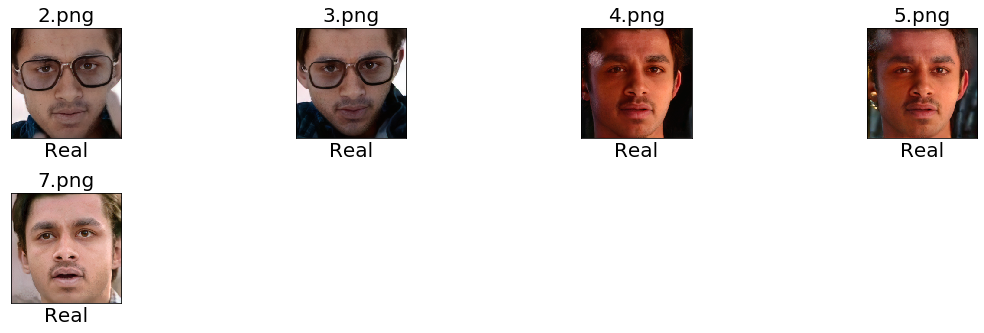

In [15]:
cnt = len([i for i in range(count) if round(confidences[i]) == 1])
print("Real Faces Predicted:", cnt)
if cnt > 0:
    fig = plt.figure(figsize=(16,9))
    tmp = 0
    for i in range(count):
        if round(confidences[i]) == 1:
            tmp += 1
            img = cv2.cvtColor (cv2.imread('Restores/'+media.split('.')[0]+'/'+str(i)+'.png'), cv2.COLOR_BGR2RGB)
            fig.add_subplot(4,4,tmp)
            plt.title(str(i)+'.png', fontsize = 20)
            plt.imshow(np.squeeze(img))
            plt.xlabel("Real", fontsize = 20)
            plt.tight_layout()
            ax = plt.gca()
            ax.axes.xaxis.set_ticks([])
            ax.axes.yaxis.set_ticks([])
    plt.show

Deepfake Faces Predicted: 4


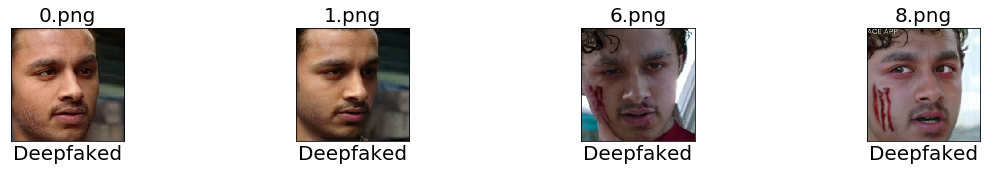

In [16]:
cnt = len([i for i in range(count) if round(confidences[i]) == 0])
print("Deepfake Faces Predicted:", cnt)
if cnt > 0:
    if not os.path.exists("Deepfakes/"+media.split('.')[0]):
        os.mkdir("Deepfakes/"+media.split('.')[0])
    fig = plt.figure(figsize=(16,9))
    tmp = 0
    for i in range(count):
        if round(confidences[i]) == 0:
            tmp += 1
            pic = cv2.imread('Restores/'+media.split('.')[0]+'/'+str(i)+'.png')
            cv2.imwrite('Deepfakes/'+media.split('.')[0]+'/'+str(i)+'.png', pic)
            img = cv2.cvtColor (pic, cv2.COLOR_BGR2RGB)
            fig.add_subplot(4,4,tmp)
            plt.title(str(i)+'.png', fontsize = 20)
            plt.imshow(np.squeeze(img))
            plt.xlabel("Deepfaked", fontsize = 20)
            plt.tight_layout()
            ax = plt.gca()
            ax.axes.xaxis.set_ticks([])
            ax.axes.yaxis.set_ticks([])
    plt.show